# Decision analysis in Python - The case of the Oakland A's

## Dependencies

In [1]:
import numpy as np
import pandas as pd

## Base case analysis

### Decision Tree

In [2]:
# Create data frame of all possible outcomes
decision_list = ['Oakland', 'Las Vegas']

# First Node
chance_node_stadium_money_scenarios = ['Optimistic', 'Neutral', 'Pessimistic']
chance_node_stadium_money_probabilities_oakland = [0.1, 0.3, 0.6]
chance_node_stadium_money_probabilities_vegas = [0.5, 0.4, 0.1]
chance_node_stadium_money_values = [855, 500, 0]

#Second Node
chance_node_ticket_sales_scenarios = ['Optimistic', 'Neutral', 'Pessimistic']
chance_node_ticket_sales_probabilities_oakland = [0.2, 0.2, 0.6]
chance_node_ticket_sales_probabilities_vegas = [0.3, 0.4, 0.3]
chance_node_ticket_sales_values_per_year = [80, 55, 27]

# Third Node
chance_node_rsn_revenue_scenarios = ['Optimistic', 'Neutral', 'Pessimistic']
chance_node_rsn_revenue_probabilities_oakland = [0.15, 0.5, 0.35]
chance_node_rsn_revenue_probabilities_vegas = [0.1, 0.3, 0.6]
chance_node_rsn_revenue_values_per_year = [60, 45, 36]

# Convert annual values to NPV of 10 year time horizon
time_horizon = 10 # years
discount_rate = 0.03 # per year
chance_node_ticket_sales_values = [val * (1 - (1/((1 + discount_rate)**time_horizon)))/discount_rate for val in chance_node_ticket_sales_values_per_year]
chance_node_rsn_revenue_values = [val * (1 - (1/((1 + discount_rate)**time_horizon)))/discount_rate for val in chance_node_rsn_revenue_values_per_year]

# Create data frame of all possible scenarios
decision_list_list_for_df = []
chance_node_stadium_money_list_for_df = []
chance_node_stadium_money_probability_list_for_df = []
chance_node_stadium_money_value_list_for_df = []
chance_node_ticket_sales_list_for_df = []
chance_node_ticket_sales_probability_list_for_df = []
chance_node_ticket_sales_value_list_for_df = []
chance_node_rsn_revenue_list_for_df = []
chance_node_rsn_revenue_probability_list_for_df = []
chance_node_rsn_revenue_value_list_for_df = []

for i in decision_list:
    for j in range(len(chance_node_stadium_money_scenarios)):
        for k in range(len(chance_node_rsn_revenue_scenarios)):
            for m in range(len(chance_node_rsn_revenue_scenarios)):
                decision_list_list_for_df.append(i)
                chance_node_stadium_money_list_for_df.append(chance_node_stadium_money_scenarios[j])
                chance_node_stadium_money_value_list_for_df.append(chance_node_stadium_money_values[j])
                chance_node_ticket_sales_list_for_df.append(chance_node_ticket_sales_scenarios[k])
                chance_node_ticket_sales_value_list_for_df.append(chance_node_ticket_sales_values[k])
                chance_node_rsn_revenue_list_for_df.append(chance_node_rsn_revenue_scenarios[m])
                chance_node_rsn_revenue_value_list_for_df.append(chance_node_rsn_revenue_values[m])
                
                if i == 'Oakland':
                    chance_node_stadium_money_probability_list_for_df.append(chance_node_stadium_money_probabilities_oakland[j])
                    chance_node_ticket_sales_probability_list_for_df.append(chance_node_ticket_sales_probabilities_oakland[k])
                    chance_node_rsn_revenue_probability_list_for_df.append(chance_node_rsn_revenue_probabilities_oakland[m])
                elif i == 'Las Vegas':
                    chance_node_stadium_money_probability_list_for_df.append(chance_node_stadium_money_probabilities_vegas[j])
                    chance_node_ticket_sales_probability_list_for_df.append(chance_node_ticket_sales_probabilities_vegas[k])
                    chance_node_rsn_revenue_probability_list_for_df.append(chance_node_rsn_revenue_probabilities_vegas[m])
                    
decision_tree_df = pd.DataFrame(list(zip(decision_list_list_for_df, chance_node_stadium_money_list_for_df,
                                         chance_node_stadium_money_probability_list_for_df,
                                         chance_node_stadium_money_value_list_for_df,
                                         chance_node_ticket_sales_list_for_df,
                                         chance_node_ticket_sales_probability_list_for_df,
                                         chance_node_ticket_sales_value_list_for_df,
                                         chance_node_rsn_revenue_list_for_df,
                                         chance_node_rsn_revenue_probability_list_for_df,
                                         chance_node_rsn_revenue_value_list_for_df)),
                               columns = ['Decision',
                                          'Stadium_Money_Result', 'Stadium_Money_Prob', 'Stadium_Money_Value',
                                          'Ticket_Sales_Result', 'Ticket_Sales_Prob', 'Ticket_Sales_Value', 
                                          'RSN_Revenue_Result', 'RSN_Revenue_Prob', 'RSN_Revenue_Value'])

In [3]:
decision_tree_df

,Decision,Stadium_Money_Result,Stadium_Money_Prob,Stadium_Money_Value,Ticket_Sales_Result,Ticket_Sales_Prob,Ticket_Sales_Value,RSN_Revenue_Result,RSN_Revenue_Prob,RSN_Revenue_Value
0,Oakland,Optimistic,0.1,855,Optimistic,0.2,682.416227,Optimistic,0.15,511.812170
1,Oakland,Optimistic,0.1,855,Optimistic,0.2,682.416227,Neutral,0.50,383.859128
2,Oakland,Optimistic,0.1,855,Optimistic,0.2,682.416227,Pessimistic,0.35,307.087302
3,Oakland,Optimistic,0.1,855,Neutral,0.2,469.161156,Optimistic,0.15,511.812170
4,Oakland,Optimistic,0.1,855,Neutral,0.2,469.161156,Neutral,0.50,383.859128
5,Oakland,Optimistic,0.1,855,Neutral,0.2,469.161156,Pessimistic,0.35,307.087302
6,Oakland,Optimistic,0.1,855,Pessimistic,0.6,230.315477,Optimistic,0.15,511.812170
7,Oakland,Optimistic,0.1,855,Pessimistic,0.6,230.315477,Neutral,0.50,383.859128
8,Oakland,Optimistic,0.1,855,Pessimistic,0.6,230.315477,Pessimistic,0.35,307.087302
9,Oakland,Neutral,0.3,500,Optimistic,0.2,682.416227,Optimistic,0.15,511.812170


#### Roll Back Decsision Tree

In [4]:
decision_tree_df['RSN_EV'] = decision_tree_df['RSN_Revenue_Prob'] * decision_tree_df['RSN_Revenue_Value']

# Consolidate the RSN_EV values
RSN_rollback_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['RSN_EV'].sum().reset_index()

# Keep the rest of the columns
decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()

# merge two dataframes
decision_tree_df = pd.merge(decision_tree_df, RSN_rollback_df, on = ['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\2995559355.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()


In [5]:
decision_tree_df

,Decision,Stadium_Money_Result,Stadium_Money_Prob,Ticket_Sales_Result,Ticket_Sales_Prob,Stadium_Money_Value,Ticket_Sales_Value,RSN_EV
0,Las Vegas,Neutral,0.4,Neutral,0.4,500.0,469.161156,350.591337
1,Las Vegas,Neutral,0.4,Optimistic,0.3,500.0,682.416227,350.591337
2,Las Vegas,Neutral,0.4,Pessimistic,0.3,500.0,230.315477,350.591337
3,Las Vegas,Optimistic,0.5,Neutral,0.4,855.0,469.161156,350.591337
4,Las Vegas,Optimistic,0.5,Optimistic,0.3,855.0,682.416227,350.591337
5,Las Vegas,Optimistic,0.5,Pessimistic,0.3,855.0,230.315477,350.591337
6,Las Vegas,Pessimistic,0.1,Neutral,0.4,0.0,469.161156,350.591337
7,Las Vegas,Pessimistic,0.1,Optimistic,0.3,0.0,682.416227,350.591337
8,Las Vegas,Pessimistic,0.1,Pessimistic,0.3,0.0,230.315477,350.591337
9,Oakland,Neutral,0.3,Neutral,0.2,500.0,469.161156,376.181945


In [6]:
decision_tree_df['Ticket_Sales_RSN_EV'] = decision_tree_df['Ticket_Sales_Prob'] * decision_tree_df['Ticket_Sales_Value'] + decision_tree_df['RSN_EV']

# Consolidate the Ticket Sales and RSN_EV values
ticket_sales_rollback_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob'])['Ticket_Sales_RSN_EV'].sum().reset_index()

# Keep the rest of the columns
decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob'])['Stadium_Money_Value'].mean().reset_index()

# merge two dataframes
decision_tree_df = pd.merge(decision_tree_df, ticket_sales_rollback_df, on = ['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob'])

In [7]:
decision_tree_df

,Decision,Stadium_Money_Result,Stadium_Money_Prob,Stadium_Money_Value,Ticket_Sales_RSN_EV
0,Las Vegas,Neutral,0.4,500.0,1513.257983
1,Las Vegas,Optimistic,0.5,855.0,1513.257983
2,Las Vegas,Pessimistic,0.1,0.0,1513.257983
3,Oakland,Neutral,0.3,500.0,1497.050598
4,Oakland,Optimistic,0.1,855.0,1497.050598
5,Oakland,Pessimistic,0.6,0.0,1497.050598


In [8]:
decision_tree_df['Stadium_Money_Ticket_Sales_RSN_EV'] = decision_tree_df['Stadium_Money_Prob'] * decision_tree_df['Stadium_Money_Value'] + decision_tree_df['Ticket_Sales_RSN_EV']

# Consolidate the Stadium Money, Ticket Sales, and RSN_EV values
decision_tree_df = decision_tree_df.groupby(['Decision'])['Stadium_Money_Ticket_Sales_RSN_EV'].sum().reset_index()

In [9]:
decision_tree_df

,Decision,Stadium_Money_Ticket_Sales_RSN_EV
0,Las Vegas,5167.273950
1,Oakland,4726.651794


In [10]:
optimal_decision = decision_tree_df['Decision'][np.argmax(decision_tree_df['Stadium_Money_Ticket_Sales_RSN_EV'])]

In [11]:
optimal_decision

'Las Vegas'

### Probabilistic SA

In [15]:
# Number of simulations
n_sim = 5000

# Track scenarios
oakland_stadium_money_probabilities_optimistic_list = []
oakland_stadium_money_probabilities_neutral_list = []
oakland_stadium_money_probabilities_pessimistic_list = []

oakland_ticket_sales_probabilities_optimistic_list = []
oakland_ticket_sales_probabilities_neutral_list = []
oakland_ticket_sales_probabilities_pessimistic_list = []

oakland_rsn_revenue_probabilities_optimistic_list = []
oakland_rsn_revenue_probabilities_neutral_list = []
oakland_rsn_revenue_probabilities_pessimistic_list = []

vegas_stadium_money_probabilities_optimistic_list = []
vegas_stadium_money_probabilities_neutral_list = []
vegas_stadium_money_probabilities_pessimistic_list = []

vegas_ticket_sales_probabilities_optimistic_list = []
vegas_ticket_sales_probabilities_neutral_list = []
vegas_ticket_sales_probabilities_pessimistic_list = []

vegas_rsn_revenue_probabilities_optimistic_list = []
vegas_rsn_revenue_probabilities_neutral_list = []
vegas_rsn_revenue_probabilities_pessimistic_list = []

oakland_EV_list = []
vegas_EV_list = []

decision_list = []

# Create data frame of all possible outcomes
decision_list = ['Oakland', 'Las Vegas']

# First Node
chance_node_stadium_money_scenarios = ['Optimistic', 'Neutral', 'Pessimistic']
chance_node_stadium_money_values = [855, 500, 0]

#Second Node
chance_node_ticket_sales_scenarios = ['Optimistic', 'Neutral', 'Pessimistic']
chance_node_ticket_sales_values_per_year = [80, 55, 27]

# Third Node
chance_node_rsn_revenue_scenarios = ['Optimistic', 'Neutral', 'Pessimistic']
chance_node_rsn_revenue_values_per_year = [60, 45, 36]

# Convert annual values to NPV of 10 year time horizon
time_horizon = 10 # years
discount_rate = 0.03 # per year
chance_node_ticket_sales_values = [val * (1 - (1/((1 + discount_rate)**time_horizon)))/discount_rate for val in chance_node_ticket_sales_values_per_year]
chance_node_rsn_revenue_values = [val * (1 - (1/((1 + discount_rate)**time_horizon)))/discount_rate for val in chance_node_rsn_revenue_values_per_year]


# Run the probabilistic sensitivity analysis n_sim times
for n in range(n_sim):
    
    ## Set up tree
    #First node
    chance_node_stadium_money_probabilities_oakland = np.random.uniform(0,1,3)
    chance_node_stadium_money_probabilities_oakland = chance_node_stadium_money_probabilities_oakland / np.sum(chance_node_stadium_money_probabilities_oakland)
    
    chance_node_stadium_money_probabilities_vegas = np.random.uniform(0,1,3)
    chance_node_stadium_money_probabilities_vegas = chance_node_stadium_money_probabilities_vegas / np.sum(chance_node_stadium_money_probabilities_vegas)

    #Second Node
    chance_node_ticket_sales_probabilities_oakland = np.random.uniform(0,1,3)
    chance_node_ticket_sales_probabilities_oakland = chance_node_ticket_sales_probabilities_oakland / np.sum(chance_node_ticket_sales_probabilities_oakland)
    
    chance_node_ticket_sales_probabilities_vegas = np.random.uniform(0,1,3)
    chance_node_ticket_sales_probabilities_vegas = chance_node_ticket_sales_probabilities_vegas / np.sum(chance_node_ticket_sales_probabilities_vegas)

    # Third Node
    chance_node_rsn_revenue_probabilities_oakland = np.random.uniform(0,1,3)
    chance_node_rsn_revenue_probabilities_oakland = chance_node_rsn_revenue_probabilities_oakland / np.sum(chance_node_rsn_revenue_probabilities_oakland)
    
    chance_node_rsn_revenue_probabilities_vegas = np.random.uniform(0,1,3)
    chance_node_rsn_revenue_probabilities_vegas = chance_node_rsn_revenue_probabilities_vegas / np.sum(chance_node_rsn_revenue_probabilities_vegas)
    
    # Evaluate Tree
    # Create data frame of all possible scenarios
    decision_list_list_for_df = []
    chance_node_stadium_money_list_for_df = []
    chance_node_stadium_money_probability_list_for_df = []
    chance_node_stadium_money_value_list_for_df = []
    chance_node_ticket_sales_list_for_df = []
    chance_node_ticket_sales_probability_list_for_df = []
    chance_node_ticket_sales_value_list_for_df = []
    chance_node_rsn_revenue_list_for_df = []
    chance_node_rsn_revenue_probability_list_for_df = []
    chance_node_rsn_revenue_value_list_for_df = []

    for i in decision_list:
        for j in range(len(chance_node_stadium_money_scenarios)):
            for k in range(len(chance_node_rsn_revenue_scenarios)):
                for m in range(len(chance_node_rsn_revenue_scenarios)):
                    decision_list_list_for_df.append(i)
                    chance_node_stadium_money_list_for_df.append(chance_node_stadium_money_scenarios[j])
                    chance_node_stadium_money_value_list_for_df.append(chance_node_stadium_money_values[j])
                    chance_node_ticket_sales_list_for_df.append(chance_node_ticket_sales_scenarios[k])
                    chance_node_ticket_sales_value_list_for_df.append(chance_node_ticket_sales_values[k])
                    chance_node_rsn_revenue_list_for_df.append(chance_node_rsn_revenue_scenarios[m])
                    chance_node_rsn_revenue_value_list_for_df.append(chance_node_rsn_revenue_values[m])

                    if i == 'Oakland':
                        chance_node_stadium_money_probability_list_for_df.append(chance_node_stadium_money_probabilities_oakland[j])
                        chance_node_ticket_sales_probability_list_for_df.append(chance_node_ticket_sales_probabilities_oakland[k])
                        chance_node_rsn_revenue_probability_list_for_df.append(chance_node_rsn_revenue_probabilities_oakland[m])
                    elif i == 'Las Vegas':
                        chance_node_stadium_money_probability_list_for_df.append(chance_node_stadium_money_probabilities_vegas[j])
                        chance_node_ticket_sales_probability_list_for_df.append(chance_node_ticket_sales_probabilities_vegas[k])
                        chance_node_rsn_revenue_probability_list_for_df.append(chance_node_rsn_revenue_probabilities_vegas[m])

    decision_tree_df = pd.DataFrame(list(zip(decision_list_list_for_df, chance_node_stadium_money_list_for_df,
                                             chance_node_stadium_money_probability_list_for_df,
                                             chance_node_stadium_money_value_list_for_df,
                                             chance_node_ticket_sales_list_for_df,
                                             chance_node_ticket_sales_probability_list_for_df,
                                             chance_node_ticket_sales_value_list_for_df,
                                             chance_node_rsn_revenue_list_for_df,
                                             chance_node_rsn_revenue_probability_list_for_df,
                                             chance_node_rsn_revenue_value_list_for_df)),
                                   columns = ['Decision',
                                              'Stadium_Money_Result', 'Stadium_Money_Prob', 'Stadium_Money_Value',
                                              'Ticket_Sales_Result', 'Ticket_Sales_Prob', 'Ticket_Sales_Value', 
                                              'RSN_Revenue_Result', 'RSN_Revenue_Prob', 'RSN_Revenue_Value'])
    decision_tree_df['RSN_EV'] = decision_tree_df['RSN_Revenue_Prob'] * decision_tree_df['RSN_Revenue_Value']

    # Consolidate the RSN_EV values
    RSN_rollback_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['RSN_EV'].sum().reset_index()

    # Keep the rest of the columns
    decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()

    # merge two dataframes
    decision_tree_df = pd.merge(decision_tree_df, RSN_rollback_df, on = ['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])

    decision_tree_df['Ticket_Sales_RSN_EV'] = decision_tree_df['Ticket_Sales_Prob'] * decision_tree_df['Ticket_Sales_Value'] + decision_tree_df['RSN_EV']

    # Consolidate the Ticket Sales and RSN_EV values
    ticket_sales_rollback_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob'])['Ticket_Sales_RSN_EV'].sum().reset_index()

    # Keep the rest of the columns
    decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob'])['Stadium_Money_Value'].mean().reset_index()

    # merge two dataframes
    decision_tree_df = pd.merge(decision_tree_df, ticket_sales_rollback_df, on = ['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob'])
    
    decision_tree_df['Stadium_Money_Ticket_Sales_RSN_EV'] = decision_tree_df['Stadium_Money_Prob'] * decision_tree_df['Stadium_Money_Value'] + decision_tree_df['Ticket_Sales_RSN_EV']

    # Consolidate the Stadium Money, Ticket Sales, and RSN_EV values
    decision_tree_df = decision_tree_df.groupby(['Decision'])['Stadium_Money_Ticket_Sales_RSN_EV'].sum().reset_index()
    
    # Fill out lists for meta-model inputs
    oakland_stadium_money_probabilities_optimistic_list.append(chance_node_stadium_money_probabilities_oakland[0])
    oakland_stadium_money_probabilities_neutral_list.append(chance_node_stadium_money_probabilities_oakland[1])
    oakland_stadium_money_probabilities_pessimistic_list.append(chance_node_stadium_money_probabilities_oakland[2])

    oakland_ticket_sales_probabilities_optimistic_list.append(chance_node_ticket_sales_probabilities_oakland[0])
    oakland_ticket_sales_probabilities_neutral_list.append(chance_node_ticket_sales_probabilities_oakland[1])
    oakland_ticket_sales_probabilities_pessimistic_list.append(chance_node_ticket_sales_probabilities_oakland[2])

    oakland_rsn_revenue_probabilities_optimistic_list.append(chance_node_rsn_revenue_probabilities_oakland[0])
    oakland_rsn_revenue_probabilities_neutral_list.append(chance_node_rsn_revenue_probabilities_oakland[1])
    oakland_rsn_revenue_probabilities_pessimistic_list.append(chance_node_rsn_revenue_probabilities_oakland[2])

    vegas_stadium_money_probabilities_optimistic_list.append(chance_node_stadium_money_probabilities_vegas[0])
    vegas_stadium_money_probabilities_neutral_list.append(chance_node_stadium_money_probabilities_vegas[1])
    vegas_stadium_money_probabilities_pessimistic_list.append(chance_node_stadium_money_probabilities_vegas[2])

    vegas_ticket_sales_probabilities_optimistic_list.append(chance_node_ticket_sales_probabilities_vegas[0])
    vegas_ticket_sales_probabilities_neutral_list.append(chance_node_ticket_sales_probabilities_vegas[1])
    vegas_ticket_sales_probabilities_pessimistic_list.append(chance_node_ticket_sales_probabilities_vegas[2])

    vegas_rsn_revenue_probabilities_optimistic_list.append(chance_node_rsn_revenue_probabilities_vegas[0])
    vegas_rsn_revenue_probabilities_neutral_list.append(chance_node_rsn_revenue_probabilities_vegas[1])
    vegas_rsn_revenue_probabilities_pessimistic_list.append(chance_node_rsn_revenue_probabilities_vegas[2])

    oakland_EV_list.append(decision_tree_df['Stadium_Money_Ticket_Sales_RSN_EV'][0])
    vegas_EV_list.append(decision_tree_df['Stadium_Money_Ticket_Sales_RSN_EV'][1])
    
    print(n)

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

0
1
2
3
4
5


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

6
7
8
9


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

10
11
12


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

13
14
15


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

16
17
18


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

19
20
21


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

22
23
24


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

25
26
27


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

28
29
30


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

31
32
33


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

34
35
36


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

37
38
39


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

40
41
42


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

43
44
45


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

46
47
48


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

49
50
51
52


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

53
54
55
56


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

57
58
59
60


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

61
62
63
64


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

65
66


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

67
68
69
70


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

71
72
73


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

74
75
76


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

77
78
79


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

80
81
82
83
84
85
86


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

87
88
89


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

90
91
92
93


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

94
95
96


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

97
98
99


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

100
101
102
103


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

104
105
106
107


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

108
109
110


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

111
112
113
114


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

115
116
117


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

118
119
120


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

121
122
123


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

124
125
126
127


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

128
129
130


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

131
132
133


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

134
135
136


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

137
138
139


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

140
141
142
143


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

144
145
146


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

147
148
149
150
151
152
153


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

154
155
156
157


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

158
159
160


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

161
162
163


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

164
165
166


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

167
168
169


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

170
171
172


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

173
174
175


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

176
177
178


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

179
180
181
182


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

183
184
185


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

186
187
188


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

189
190
191
192


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

193
194
195
196


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

197
198
199
200


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

201
202
203


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

204
205
206


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

207
208
209
210


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

211
212
213
214


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

215
216
217
218
219
220
221


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

222
223
224


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

225
226
227


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

228
229
230
231


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

232
233
234


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

235
236
237
238


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

239
240
241


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

242
243
244


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

245
246
247


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

248
249
250
251


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

252
253
254


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

255
256
257


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

258
259
260
261


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

262
263
264
265


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

266
267
268
269


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

270
271
272
273


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

274
275
276


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

277
278
279


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

280
281
282
283


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

284
285
286


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

287
288
289
290


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

291
292
293


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

294
295
296


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

297
298
299
300


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

301
302
303
304
305
306


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

307
308
309


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

310
311
312
313


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

314
315
316
317


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

318
319
320


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

321
322
323
324


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

325
326
327


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

328
329
330


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

331
332
333


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

334
335
336
337


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

338
339
340
341


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

342
343
344
345


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

346
347
348


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

349
350
351
352
353


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

354
355
356


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

357
358
359


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

360
361
362
363


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

364
365
366
367

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


368
369


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

370
371
372


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

373
374
375


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

376
377
378


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

379
380
381
382


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

383
384
385
386


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

387
388
389
390
391
392


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

393
394
395
396


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

397
398
399
400


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

401
402
403


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

404
405
406


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

407
408
409


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

410
411
412


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

413
414
415


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

416
417
418
419


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

420
421
422
423


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

424
425
426
427
428
429
430


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

431
432
433
434


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

435
436
437


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

438
439
440
441


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

442
443
444


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

445
446
447


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

448
449
450


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

451
452
453


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

454
455
456
457


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

458
459
460
461
462
463


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

464
465
466


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

467
468
469


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

470
471
472


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

473
474
475
476


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

477
478
479


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

480
481
482
483


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

484
485
486


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

487
488
489
490
491
492
493


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

494
495
496
497


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

498
499
500
501


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

502
503
504


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

505
506
507


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

508
509
510


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

511
512
513
514
515
516


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

517
518
519


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

520
521
522


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

523
524
525


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

526
527
528
529
530


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

531
532
533


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

534
535
536
537


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

538
539
540
541


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

542
543
544


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

545
546
547


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

548
549
550
551


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

552
553
554


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

555
556
557
558
559
560


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

561
562
563


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

564
565
566


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

567
568
569


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

570
571
572
573


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

574
575
576
577


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

578
579
580


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

581
582
583


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()


584
585
586


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

587
588
589


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

590
591
592
593


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

594
595


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

596
597
598
599
600
601
602


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

603
604
605


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

606
607
608
609


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

610
611
612


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

613
614
615
616


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

617
618
619


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

620
621
622
623
624
625
626


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

627
628
629
630


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

631
632
633


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

634
635
636


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

637
638
639
640


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

641
642
643


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

644
645
646


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

647
648
649


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

650
651
652


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

653
654
655


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

656
657
658


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

659
660
661


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

662
663
664


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

665
666
667
668


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

669
670
671


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

672
673
674


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

675
676
677


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

678
679
680


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

681
682
683
684


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

685
686
687
688


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

689
690
691


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

692
693
694
695


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

696
697
698


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

699
700
701


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

702
703
704


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

705
706
707


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

708
709
710
711


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

712
713
714
715


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

716
717
718
719


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

720
721
722


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

723
724
725


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

726
727
728
729
730
731


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

732
733
734
735


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

736
737
738


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

739
740
741


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

742
743
744
745


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

746
747
748
749
750
751
752


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

753
754
755


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

756
757
758
759


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

760
761
762


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

763
764
765
766


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

767
768
769


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

770
771
772


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

773
774
775


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

776
777
778
779


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

780
781
782


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

783
784
785
786


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

787
788
789
790


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

791
792
793
794
795
796
797


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

798
799
800
801
802
803


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

804
805
806
807


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

808
809
810
811


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

812
813
814


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

815
816
817
818


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

819
820
821
822
823
824


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

825
826
827


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

828
829
830
831


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

832
833
834
835


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

836
837
838


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

839
840
841
842


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

843
844
845


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

846
847
848
849


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

850
851
852


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

853
854
855
856


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

857
858
859


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

860
861
862


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

863
864
865
866
867
868
869


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

870
871
872


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

873
874
875


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

876
877
878


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

879
880
881


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

882
883
884


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

885
886
887


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

888
889
890


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

891
892
893


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

894
895
896


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

897
898
899


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

900
901
902


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

903
904
905
906
907


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

908
909
910


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

911
912
913
914
915
916
917


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

918
919
920
921
922
923


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

924
925
926


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

927
928
929


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

930
931
932


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

933
934
935
936


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

937
938
939
940


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

941
942
943
944
945


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

946
947
948


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

949
950
951
952


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

953
954
955


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

956
957
958


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

959
960
961


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

962
963
964


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

965
966
967


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

968
969
970


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

971
972
973


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

974
975
976
977


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

978
979
980
981


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

982
983
984


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

985
986
987
988


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

989
990


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

991
992
993


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

994
995
996


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

997
998
999


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1000
1001
1002


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1003
1004
1005


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1006
1007
1008


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1009
1010
1011
1012
1013
1014
1015


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1016
1017
1018


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1019
1020
1021


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1022
1023
1024


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1025
1026
1027
1028


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1029
1030
1031
1032


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1033
1034
1035
1036
1037
1038


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1039
1040
1041


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1042
1043
1044
1045


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1046
1047
1048


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1049
1050
1051


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1052
1053
1054


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1055
1056
1057
1058


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1059
1060
1061
1062


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1063
1064
1065


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1066
1067
1068


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1069
1070
1071


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1072
1073
1074


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1075
1076
1077
1078


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1079
1080
1081


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1082
1083
1084


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1085
1086
1087
1088
1089
1090


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1091
1092
1093
1094


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1095
1096
1097


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1098
1099
1100


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1101
1102
1103
1104


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1105
1106
1107
1108


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1109
1110
1111


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1112
1113
1114
1115


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1116
1117
1118


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1119
1120
1121


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1122
1123
1124
1125
1126
1127


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1128
1129
1130


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1131
1132
1133


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1134
1135
1136


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1137
1138
1139


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1140
1141
1142


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1143
1144
1145


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1146
1147
1148


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1149
1150
1151


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1152
1153
1154


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1155
1156
1157


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1158
1159


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1160
1161
1162
1163


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1164
1165
1166


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1167
1168
1169
1170


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1171
1172
1173


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1174
1175
1176


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1177
1178
1179


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1180
1181
1182
1183
1184
1185
1186


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1187
1188
1189


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1190
1191
1192


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1193
1194
1195


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1196
1197
1198


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1199
1200
1201


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1202
1203
1204


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1205
1206
1207


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1208
1209
1210


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1211
1212
1213


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1214
1215
1216


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1217
1218
1219


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1220
1221
1222
1223


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1224
1225
1226
1227


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1228
1229
1230
1231
1232
1233


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1234
1235
1236
1237

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


1238
1239


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1240
1241
1242
1243


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1244
1245
1246


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1247
1248
1249
1250


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1251
1252
1253


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1254
1255
1256


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1257
1258
1259


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1260
1261
1262


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1263
1264
1265


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1266
1267
1268


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1269
1270
1271


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1272
1273
1274


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1275
1276
1277


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1278
1279
1280


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1281
1282
1283


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1284
1285
1286
1287


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1288
1289
1290
1291


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1292
1293
1294


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1295
1296
1297


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1298
1299
1300
1301


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1302
1303
1304
1305


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1306
1307
1308


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1309
1310
1311
1312


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1313
1314
1315


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1316
1317
1318


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1319
1320
1321


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1322
1323
1324


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1325
1326
1327


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1328
1329
1330


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1331
1332
1333
1334


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1335
1336
1337


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1338
1339
1340


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1341
1342
1343
1344


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1345
1346
1347
1348
1349
1350
1351


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1352
1353
1354
1355


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1356
1357
1358
1359


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1360
1361
1362


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1363
1364
1365
1366


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1367
1368
1369


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1370
1371
1372
1373


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1374
1375
1376
1377
1378


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1379
1380
1381


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1382
1383
1384


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1385
1386
1387


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1388
1389
1390


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1391
1392
1393


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1394
1395
1396


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1397
1398
1399


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1400
1401
1402
1403


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1404
1405
1406


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1407
1408
1409


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1410
1411
1412


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1413
1414
1415


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1416
1417
1418


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1419
1420
1421


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1422
1423
1424


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1425
1426
1427


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()


1428
1429
1430


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1431
1432
1433


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1434
1435
1436


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1437
1438
1439


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1440
1441
1442


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1443
1444
1445


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1446
1447
1448


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1449
1450
1451


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1452
1453
1454
1455


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1456
1457
1458


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1459
1460
1461


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1462
1463
1464


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1465
1466
1467


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1468
1469
1470


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1471
1472
1473


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1474
1475
1476


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1477
1478
1479


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1480
1481
1482


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1483
1484
1485
1486


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1487
1488
1489
1490


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1491
1492
1493


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1494
1495
1496


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1497
1498
1499


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1500
1501
1502


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1503
1504
1505
1506


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1507
1508
1509
1510


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1511
1512
1513


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1514
1515
1516


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1517
1518
1519


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1520
1521
1522


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1523
1524
1525


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1526
1527
1528


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1529
1530
1531


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1532
1533
1534


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1535
1536
1537


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1538
1539
1540


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1541
1542
1543


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1544
1545
1546


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1547
1548
1549


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1550
1551
1552
1553


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1554
1555
1556


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1557
1558
1559


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1560
1561
1562


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1563
1564
1565


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1566
1567
1568


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1569
1570
1571


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1572
1573
1574


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1575
1576
1577


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1578
1579
1580


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1581
1582
1583


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1584
1585
1586


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1587
1588
1589


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1590
1591
1592
1593


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1594
1595
1596


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1597
1598
1599


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1600
1601
1602


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1603
1604
1605


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1606
1607
1608


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1609
1610
1611


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1612
1613
1614


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1615
1616
1617


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1618
1619
1620


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1621
1622
1623


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1624
1625
1626


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1627
1628
1629


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1630
1631
1632


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1633
1634
1635


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1636
1637
1638


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1639
1640
1641
1642


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1643
1644
1645


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1646
1647
1648
1649


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1650
1651
1652


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1653
1654
1655


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1656
1657
1658


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1659
1660
1661


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1662
1663
1664


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1665
1666
1667


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1668
1669
1670


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1671
1672
1673


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1674
1675
1676


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1677
1678
1679


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1680
1681
1682


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1683
1684
1685


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1686
1687
1688


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1689
1690
1691


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1692
1693
1694


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1695
1696
1697
1698


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1699
1700
1701


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1702
1703
1704
1705


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1706
1707
1708


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1709
1710
1711


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1712
1713
1714
1715


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1716
1717
1718


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1719
1720
1721
1722


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1723
1724
1725
1726


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1727
1728
1729


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1730
1731
1732
1733
1734
1735
1736


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1737
1738
1739


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1740
1741
1742
1743


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1744
1745
1746
1747


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1748
1749
1750


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1751
1752
1753
1754


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1755
1756
1757


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1758
1759
1760


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1761
1762
1763


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1764
1765
1766


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1767
1768
1769


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1770
1771
1772
1773


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1774
1775
1776


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1777
1778
1779


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1780
1781
1782
1783


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1784
1785
1786


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1787
1788
1789
1790


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1791
1792
1793


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1794
1795
1796


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1797
1798
1799
1800


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1801
1802
1803
1804


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1805
1806
1807


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1808
1809
1810
1811


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1812
1813
1814


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1815
1816
1817


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1818
1819
1820


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1821
1822
1823


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1824
1825
1826


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1827
1828
1829
1830


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1831
1832
1833


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1834
1835
1836
1837


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1838
1839
1840


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1841
1842
1843


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1844
1845
1846


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1847
1848
1849


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1850
1851
1852


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1853
1854
1855


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1856
1857
1858


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1859
1860
1861


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1862
1863
1864


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1865
1866
1867
1868


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1869
1870
1871


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1872
1873
1874


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1875
1876
1877


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1878
1879
1880


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1881
1882
1883


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1884
1885
1886


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1887
1888
1889
1890


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1891
1892
1893


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1894
1895
1896


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1897
1898
1899


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1900
1901
1902
1903
1904
1905
1906


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1907
1908
1909


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1910
1911
1912
1913


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1914
1915
1916
1917


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1918
1919
1920
1921


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1922
1923
1924


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1925
1926
1927


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1928
1929
1930
1931


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1932
1933
1934
1935


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1936
1937
1938
1939


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1940
1941
1942
1943
1944
1945
1946


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1947
1948
1949
1950
1951
1952


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1953
1954
1955
1956


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1957
1958
1959


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1960
1961
1962


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1963
1964
1965


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1966
1967
1968
1969
1970
1971
1972


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1973
1974
1975


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1976
1977
1978
1979


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1980
1981
1982
1983


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1984
1985
1986
1987


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1988
1989
1990
1991


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1992
1993
1994
1995


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1996
1997
1998


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

1999
2000
2001


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2002
2003
2004
2005
2006


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2007
2008
2009
2010


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2011
2012
2013
2014


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2015
2016
2017
2018


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2019
2020
2021


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2022
2023
2024
2025
2026
2027
2028


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2029
2030
2031
2032


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2033
2034
2035
2036


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2037
2038
2039


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2040
2041
2042
2043
2044


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2045
2046
2047
2048


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2049
2050
2051
2052


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2053
2054
2055


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2056
2057
2058


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2059
2060
2061


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2062
2063
2064
2065
2066
2067
2068


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2069
2070
2071
2072
2073
2074


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2075
2076
2077
2078


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2079
2080
2081
2082


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2083
2084
2085


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2086
2087
2088
2089


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2090
2091
2092
2093


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2094
2095
2096


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2097
2098
2099


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2100
2101
2102
2103


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2104
2105
2106
2107


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2108
2109
2110


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2111
2112
2113


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2114
2115
2116
2117


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2118
2119
2120
2121


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2122
2123
2124
2125


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2126
2127
2128
2129


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2130
2131
2132
2133


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2134
2135
2136


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2137
2138
2139
2140


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2141
2142
2143


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2144
2145
2146


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2147
2148
2149


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2150
2151
2152


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2153
2154
2155


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2156
2157
2158
2159


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2160
2161
2162
2163


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2164
2165
2166
2167


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2168
2169
2170
2171


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2172
2173
2174


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2175
2176
2177
2178


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2179
2180
2181
2182


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2183
2184
2185


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2186
2187
2188
2189


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2190
2191
2192


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2193
2194
2195
2196


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2197
2198
2199
2200


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2201
2202
2203


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2204
2205
2206
2207

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


2208
2209


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2210
2211
2212
2213
2214
2215


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2216
2217
2218


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2219
2220
2221
2222


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2223
2224
2225
2226
2227
2228


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2229
2230
2231


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2232
2233
2234


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2235
2236
2237


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2238
2239
2240
2241


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2242
2243
2244


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2245
2246
2247


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2248
2249
2250


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2251
2252
2253
2254


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2255
2256
2257
2258
2259


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2260
2261
2262
2263


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2264
2265
2266
2267


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2268
2269
2270
2271


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2272
2273
2274
2275


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2276
2277
2278


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2279
2280
2281


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2282
2283
2284
2285
2286
2287
2288
2289


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2290
2291
2292


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2293
2294
2295


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2296
2297
2298


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2299
2300
2301
2302


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2303
2304
2305


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2306
2307
2308


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2309
2310
2311


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2312
2313
2314


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2315
2316
2317
2318


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2319
2320
2321
2322


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2323
2324
2325
2326


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2327
2328
2329


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2330
2331
2332


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2333
2334
2335


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2336
2337
2338


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2339
2340
2341
2342


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2343
2344
2345


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2346
2347
2348
2349


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2350
2351
2352


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2353
2354
2355


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2356
2357
2358


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2359
2360
2361


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2362
2363
2364


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2365
2366
2367
2368


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2369
2370
2371


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2372
2373
2374
2375


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2376
2377
2378


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2379
2380
2381
2382


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2383
2384
2385


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2386
2387
2388


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2389
2390
2391


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2392
2393
2394


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2395
2396
2397


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2398
2399
2400


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2401
2402
2403


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2404
2405
2406


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2407
2408
2409


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2410
2411
2412


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2413
2414
2415


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2416
2417
2418


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2419
2420
2421


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2422
2423
2424


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2425
2426
2427
2428


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2429
2430
2431


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2432
2433
2434
2435


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2436
2437
2438


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2439
2440
2441


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2442
2443
2444


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2445
2446
2447
2448


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2449
2450
2451


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2452
2453
2454


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2455
2456
2457


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2458
2459
2460


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2461
2462
2463
2464
2465
2466


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2467
2468
2469


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2470
2471
2472


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2473
2474
2475


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2476
2477
2478
2479


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2480
2481
2482


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2483
2484
2485


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2486
2487
2488


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2489
2490
2491
2492


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2493
2494
2495
2496


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2497
2498
2499


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2500
2501
2502
2503


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2504
2505
2506


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2507
2508
2509
2510
2511


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2512
2513
2514
2515


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2516
2517
2518
2519


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2520
2521
2522


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2523
2524
2525


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2526
2527
2528


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2529
2530
2531


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2532
2533
2534
2535


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2536
2537


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2538
2539
2540


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2541
2542
2543
2544


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2545
2546
2547


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2548
2549
2550
2551


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2552
2553
2554
2555


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2556
2557
2558
2559


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2560
2561
2562
2563


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2564
2565
2566
2567


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2568
2569
2570


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2571
2572
2573


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2574
2575
2576
2577


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2578
2579
2580


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2581
2582
2583
2584


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2585
2586
2587


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2588
2589
2590
2591


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2592
2593
2594
2595
2596
2597
2598


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2599
2600


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2601
2602
2603


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2604
2605
2606


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2607
2608
2609


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2610
2611
2612
2613


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2614
2615
2616


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2617
2618
2619
2620


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2621
2622
2623


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2624
2625
2626


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2627
2628
2629


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2630
2631
2632


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2633
2634
2635
2636
2637


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2638
2639
2640
2641


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2642
2643
2644


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2645
2646
2647
2648


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2649
2650
2651
2652
2653
2654


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2655
2656
2657
2658


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2659
2660
2661
2662


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2663
2664
2665
2666


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2667
2668
2669


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2670
2671
2672


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2673
2674
2675


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2676
2677
2678


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2679
2680
2681
2682


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2683
2684
2685


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2686
2687
2688


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2689
2690
2691


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2692
2693
2694


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2695
2696
2697


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2698
2699
2700


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2701
2702
2703
2704


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2705
2706
2707
2708
2709
2710
2711


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2712
2713
2714


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2715
2716
2717


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2718
2719
2720
2721


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2722
2723
2724


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2725
2726
2727


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2728
2729
2730


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2731
2732
2733
2734


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2735
2736
2737
2738


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2739
2740
2741


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2742
2743
2744


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2745
2746
2747
2748


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2749
2750
2751
2752


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2753
2754
2755


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2756
2757
2758
2759


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2760
2761
2762
2763


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2764
2765
2766


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2767
2768
2769
2770


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2771
2772
2773


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2774
2775
2776


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2777
2778
2779


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2780
2781
2782
2783


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2784
2785
2786


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2787
2788
2789


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2790
2791
2792


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2793
2794
2795
2796


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2797
2798
2799
2800
2801
2802
2803


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2804
2805
2806


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2807
2808
2809


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2810
2811
2812


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2813
2814
2815
2816


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2817
2818
2819


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2820
2821
2822


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2823
2824
2825
2826


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2827
2828
2829


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2830
2831
2832


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2833
2834
2835


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2836
2837
2838


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2839
2840
2841


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2842
2843
2844


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2845
2846
2847
2848


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2849
2850
2851
2852
2853
2854
2855


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2856
2857
2858
2859


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2860
2861
2862
2863


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2864
2865
2866
2867


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2868
2869
2870
2871


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2872
2873
2874
2875
2876
2877


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2878
2879
2880


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2881
2882
2883


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2884
2885
2886
2887


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2888
2889
2890
2891
2892
2893


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2894
2895
2896
2897
2898


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2899
2900
2901


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2902
2903
2904
2905


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2906
2907
2908


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2909
2910
2911


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2912
2913
2914
2915
2916
2917


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2918
2919
2920


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2921
2922
2923
2924


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2925
2926
2927


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2928
2929
2930
2931


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2932
2933
2934
2935


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2936
2937
2938
2939


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2940
2941
2942


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2943
2944
2945
2946


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2947
2948
2949


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2950
2951
2952


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2953
2954
2955
2956


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2957
2958
2959


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2960
2961
2962
2963


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2964
2965
2966
2967


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2968
2969
2970


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2971
2972
2973


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2974
2975
2976
2977


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2978
2979
2980


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2981
2982
2983
2984


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2985
2986
2987


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2988
2989
2990
2991


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2992
2993
2994
2995


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

2996
2997
2998
2999


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3000
3001
3002


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3003
3004
3005
3006
3007


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3008
3009
3010
3011


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3012
3013
3014


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3015
3016
3017
3018


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3019
3020
3021


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3022
3023
3024
3025
3026
3027


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3028
3029
3030


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3031
3032
3033
3034


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3035
3036
3037


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3038
3039
3040


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3041
3042
3043
3044


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3045
3046
3047
3048


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3049
3050
3051
3052


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3053
3054
3055


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3056
3057
3058
3059
3060


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3061
3062
3063


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3064
3065
3066


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3067
3068
3069
3070


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3071
3072
3073
3074


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3075
3076
3077


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3078
3079
3080
3081
3082


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3083
3084
3085


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3086
3087
3088
3089
3090
3091


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3092
3093
3094


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3095
3096
3097


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3098
3099
3100
3101


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3102
3103
3104


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3105
3106
3107
3108


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3109
3110
3111


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3112
3113
3114
3115


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3116
3117
3118


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3119
3120
3121
3122


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3123
3124
3125
3126


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3127
3128
3129
3130


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3131
3132
3133


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3134
3135
3136
3137


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3138
3139
3140


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3141
3142
3143
3144
3145


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3146
3147
3148


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3149
3150
3151
3152


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3153
3154
3155


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3156
3157
3158


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3159
3160
3161


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3162
3163
3164


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3165
3166
3167


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3168
3169
3170


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3171
3172
3173


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3174
3175
3176
3177


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3178
3179
3180
3181


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3182
3183
3184
3185

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


3186
3187
3188
3189
3190
3191
3192


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3193
3194
3195
3196


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3197
3198
3199


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3200
3201
3202
3203


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3204
3205
3206


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3207
3208
3209
3210


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3211
3212
3213


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3214
3215
3216


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3217
3218
3219


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3220
3221
3222
3223


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3224
3225
3226


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3227
3228
3229


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3230
3231
3232


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3233
3234
3235


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3236
3237
3238


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3239
3240
3241


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3242
3243
3244


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3245
3246
3247
3248


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3249
3250
3251
3252
3253
3254
3255


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3256
3257
3258
3259
3260
3261


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3262
3263
3264


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3265
3266
3267


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3268
3269
3270


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3271
3272
3273
3274

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


3275
3276
3277
3278
3279
3280


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3281
3282
3283
3284


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3285
3286
3287


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3288
3289
3290
3291


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3292
3293
3294


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3295
3296
3297


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3298
3299


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3300
3301
3302


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3303
3304
3305


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3306
3307
3308
3309
3310

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


3311
3312


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3313
3314
3315
3316


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3317
3318
3319
3320


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3321
3322
3323


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3324
3325
3326
3327


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3328
3329
3330


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3331
3332
3333


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3334
3335
3336


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3337
3338
3339


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3340
3341
3342


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3343
3344
3345
3346
3347
3348


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3349
3350
3351


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3352
3353
3354


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3355
3356
3357


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3358
3359
3360


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3361
3362
3363


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3364
3365
3366


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3367
3368
3369


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3370
3371
3372
3373


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3374
3375
3376
3377


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3378
3379
3380


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3381
3382
3383


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3384
3385
3386


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3387
3388
3389
3390


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3391
3392
3393


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3394
3395
3396
3397
3398


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3399
3400
3401


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3402
3403
3404


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3405
3406
3407


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3408
3409
3410
3411


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3412
3413
3414


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3415
3416
3417


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3418
3419
3420


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3421
3422
3423


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3424
3425
3426
3427


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3428
3429
3430
3431


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3432
3433
3434
3435


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3436
3437
3438


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3439
3440
3441


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3442
3443
3444


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3445
3446
3447


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3448
3449
3450


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3451
3452
3453


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3454
3455
3456


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3457
3458
3459


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3460
3461
3462
3463
3464


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3465
3466
3467
3468
3469
3470
3471


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3472
3473
3474


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3475
3476
3477
3478
3479


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3480
3481
3482


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3483
3484
3485


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3486
3487
3488


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3489
3490
3491


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3492
3493
3494
3495


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3496
3497
3498


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3499
3500
3501
3502


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3503
3504
3505


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3506
3507
3508


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3509
3510
3511


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3512
3513
3514


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3515
3516
3517


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3518
3519
3520
3521
3522
3523
3524


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3525
3526
3527


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3528
3529
3530
3531


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3532
3533
3534
3535
3536
3537
3538


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3539
3540
3541
3542


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3543
3544
3545
3546


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3547
3548
3549
3550
3551
3552
3553


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3554
3555
3556


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3557
3558
3559


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3560
3561
3562


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3563
3564
3565


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3566
3567
3568
3569


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3570
3571
3572
3573
3574
3575


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3576
3577
3578
3579
3580
3581
3582
3583


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3584
3585
3586
3587


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3588
3589
3590


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3591
3592
3593


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3594
3595
3596


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3597
3598
3599


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3600
3601
3602
3603


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3604
3605
3606


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3607
3608
3609
3610


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3611
3612
3613


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3614
3615
3616
3617
3618


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3619
3620
3621


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3622
3623
3624
3625


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3626
3627
3628


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3629
3630
3631


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3632
3633
3634
3635


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3636
3637
3638


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3639
3640
3641
3642


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3643
3644
3645


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3646
3647
3648


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3649
3650
3651


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3652
3653
3654


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3655
3656
3657
3658


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3659
3660
3661
3662


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3663
3664
3665
3666

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


3667
3668
3669


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3670
3671
3672
3673


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3674
3675
3676
3677


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3678
3679
3680


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3681
3682
3683
3684


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3685
3686
3687
3688


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3689
3690
3691
3692
3693
3694
3695


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3696
3697
3698


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3699
3700
3701


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3702
3703
3704
3705
3706


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3707
3708
3709
3710
3711
3712
3713


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3714
3715
3716


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3717
3718
3719
3720


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3721
3722
3723
3724


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3725
3726
3727


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3728
3729
3730
3731


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3732
3733
3734
3735


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3736
3737
3738
3739


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3740
3741
3742


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3743
3744
3745


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3746
3747
3748


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3749
3750
3751
3752
3753
3754
3755


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3756
3757
3758
3759


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3760
3761
3762


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3763
3764
3765


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3766
3767
3768
3769


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3770
3771
3772
3773

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


3774
3775
3776


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3777
3778
3779


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3780
3781
3782


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3783
3784
3785
3786


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3787
3788
3789


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3790
3791
3792


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3793
3794
3795
3796


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3797
3798
3799


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3800
3801
3802


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3803
3804
3805
3806


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3807
3808
3809


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3810
3811
3812
3813


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3814
3815
3816


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3817
3818
3819
3820


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3821
3822
3823
3824
3825


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3826
3827
3828


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3829
3830
3831
3832


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3833
3834
3835
3836


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3837
3838
3839
3840


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3841
3842
3843


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3844
3845
3846
3847


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3848
3849
3850


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3851
3852
3853


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3854
3855
3856
3857


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3858
3859
3860
3861


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3862
3863
3864


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3865
3866
3867
3868


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3869
3870
3871
3872


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3873
3874
3875


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3876
3877
3878
3879


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3880
3881
3882


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3883
3884
3885
3886
3887
3888
3889
3890


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3891
3892
3893


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3894
3895


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3896
3897
3898
3899
3900
3901
3902
3903


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3904
3905
3906
3907


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3908
3909
3910
3911


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3912
3913
3914
3915


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3916
3917
3918
3919


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3920
3921
3922
3923


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3924
3925
3926


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3927
3928
3929
3930
3931
3932
3933
3934


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3935
3936
3937


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3938
3939
3940


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3941
3942
3943


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3944
3945
3946
3947
3948
3949


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3950
3951
3952
3953
3954


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3955
3956
3957
3958


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3959
3960
3961
3962


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3963
3964
3965
3966


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3967
3968
3969


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3970
3971
3972
3973


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3974
3975
3976


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3977
3978
3979


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3980
3981
3982


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3983
3984
3985
3986


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3987
3988
3989
3990


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3991
3992
3993
3994
3995
3996
3997


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

3998
3999
4000


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4001
4002
4003
4004


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4005
4006
4007


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4008
4009
4010


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4011
4012
4013
4014


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4015
4016
4017
4018
4019


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4020
4021
4022


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4023
4024
4025
4026


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4027
4028
4029


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4030
4031
4032
4033


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4034
4035
4036
4037


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4038
4039
4040


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4041
4042
4043


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()


4044
4045
4046


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4047
4048
4049


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4050
4051
4052


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4053
4054
4055


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4056
4057
4058


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4059
4060
4061
4062
4063


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4064
4065
4066
4067


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4068
4069
4070
4071


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4072
4073
4074


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4075
4076
4077


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4078
4079
4080
4081


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4082
4083
4084
4085


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4086
4087
4088
4089


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4090
4091
4092
4093


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4094
4095
4096
4097


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4098
4099
4100


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4101
4102
4103


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4104
4105
4106


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4107
4108
4109


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4110
4111
4112


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4113
4114
4115
4116


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4117
4118
4119


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4120
4121
4122


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4123
4124
4125
4126


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4127
4128
4129


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4130
4131
4132
4133
4134
4135
4136


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4137
4138
4139


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4140
4141
4142
4143


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4144
4145
4146


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4147
4148
4149


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4150
4151
4152
4153


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4154
4155
4156
4157
4158
4159
4160


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4161
4162
4163


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4164
4165
4166


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4167
4168
4169


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4170
4171
4172


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4173
4174
4175
4176


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4177
4178
4179


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4180
4181
4182
4183


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4184
4185
4186


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4187
4188
4189


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4190
4191
4192


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4193
4194
4195


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4196
4197
4198
4199


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4200
4201
4202


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4203
4204
4205


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4206
4207
4208
4209
4210


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4211
4212
4213


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4214
4215
4216


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4217
4218
4219
4220


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4221
4222
4223


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4224
4225
4226


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4227
4228
4229
4230


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4231
4232
4233
4234


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4235
4236
4237
4238


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4239
4240
4241
4242


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4243
4244
4245


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4246
4247
4248


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4249
4250
4251
4252


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4253
4254
4255
4256
4257
4258
4259


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4260
4261
4262
4263


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4264
4265
4266


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4267
4268
4269


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4270
4271
4272
4273
4274


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4275
4276
4277
4278
4279
4280
4281


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4282
4283
4284


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4285
4286
4287
4288
4289
4290


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4291
4292
4293
4294


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4295
4296
4297


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4298
4299
4300
4301
4302


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4303
4304
4305


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4306
4307
4308


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4309
4310
4311


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4312
4313
4314
4315
4316


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4317
4318
4319
4320
4321
4322
4323


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4324
4325
4326


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4327
4328
4329


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4330
4331
4332
4333


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4334
4335
4336


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4337
4338
4339


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4340
4341
4342

C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 


4343
4344
4345
4346
4347


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4348
4349
4350


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4351
4352
4353


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4354
4355
4356


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4357
4358
4359


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4360
4361
4362


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4363
4364
4365


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4366
4367
4368


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4369
4370
4371
4372


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4373
4374
4375
4376


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4377
4378
4379


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4380
4381
4382
4383


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4384
4385
4386


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4387
4388
4389


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4390
4391
4392


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4393
4394
4395
4396


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4397
4398
4399
4400


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4401
4402
4403


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4404
4405
4406


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4407
4408
4409


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4410
4411
4412
4413


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4414
4415
4416


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4417
4418
4419
4420


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4421
4422
4423
4424
4425
4426
4427


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4428
4429
4430


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4431
4432
4433


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4434
4435
4436


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4437
4438
4439


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4440
4441
4442
4443


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4444
4445
4446
4447


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4448
4449
4450
4451


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4452
4453
4454


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4455
4456
4457


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4458
4459
4460


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4461
4462
4463
4464


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4465
4466
4467


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4468
4469
4470
4471
4472
4473
4474
4475


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4476
4477
4478
4479


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4480
4481
4482
4483
4484
4485
4486


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4487
4488
4489


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4490
4491
4492


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4493
4494
4495


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4496
4497
4498


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4499
4500
4501
4502


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4503
4504
4505


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4506
4507
4508
4509


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4510
4511
4512
4513
4514
4515
4516


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4517
4518
4519


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4520
4521
4522
4523
4524


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4525
4526
4527
4528


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4529
4530
4531


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4532
4533
4534


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4535
4536
4537


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4538
4539
4540


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4541
4542
4543


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4544
4545
4546
4547


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4548
4549
4550
4551


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4552
4553
4554
4555


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4556
4557
4558


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4559
4560
4561
4562


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4563
4564
4565
4566


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4567
4568
4569
4570


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4571
4572
4573


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4574
4575
4576


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4577
4578
4579


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4580
4581
4582
4583


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4584
4585
4586
4587


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4588
4589
4590


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4591
4592
4593
4594


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4595
4596
4597
4598


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4599
4600
4601
4602


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4603
4604
4605
4606


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4607
4608
4609


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4610
4611
4612
4613


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4614
4615
4616
4617


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4618
4619
4620
4621


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4622
4623
4624


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4625
4626
4627
4628
4629


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4630
4631
4632
4633


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4634
4635
4636
4637


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4638
4639
4640
4641


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4642
4643
4644
4645


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4646
4647
4648
4649


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4650
4651
4652
4653
4654
4655


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4656
4657
4658
4659


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4660
4661
4662
4663


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4664
4665
4666
4667


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4668
4669
4670


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4671
4672
4673


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4674
4675
4676


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4677
4678
4679
4680


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4681
4682
4683


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4684
4685
4686


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4687
4688
4689


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4690
4691
4692


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4693
4694
4695


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4696
4697
4698
4699
4700


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4701
4702
4703
4704


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4705
4706
4707
4708
4709
4710


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4711
4712
4713


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4714
4715
4716
4717


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4718
4719
4720


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4721
4722
4723


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4724
4725
4726
4727


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4728
4729
4730


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4731
4732
4733


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4734
4735
4736
4737


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4738
4739
4740
4741
4742


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4743
4744
4745


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4746
4747
4748


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4749
4750
4751
4752


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4753
4754
4755


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4756
4757
4758
4759


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4760
4761
4762
4763


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4764
4765
4766


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4767
4768
4769
4770


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4771
4772
4773
4774


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4775
4776
4777
4778
4779


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4780
4781
4782


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4783
4784
4785


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4786
4787
4788
4789


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4790
4791
4792
4793


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4794
4795
4796


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4797
4798
4799


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4800
4801
4802
4803


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4804
4805
4806


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4807
4808
4809
4810


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4811
4812
4813
4814


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4815
4816
4817
4818


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4819
4820
4821
4822


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4823
4824
4825


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4826
4827
4828


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4829
4830
4831
4832


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4833
4834
4835


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4836
4837
4838


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4839
4840
4841
4842


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4843
4844
4845
4846


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4847
4848
4849


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4850
4851
4852


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4853
4854
4855
4856


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4857
4858
4859


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4860
4861
4862
4863


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4864
4865
4866
4867


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4868
4869
4870


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4871
4872
4873


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4874
4875
4876
4877
4878


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4879
4880
4881


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4882
4883
4884


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4885
4886
4887
4888
4889


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4890
4891
4892
4893


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4894
4895
4896


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4897
4898
4899
4900


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4901
4902
4903
4904


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4905
4906
4907
4908


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4909
4910
4911
4912
4913
4914
4915


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4916
4917
4918
4919


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4920
4921
4922


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4923
4924
4925


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4926
4927
4928


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4929
4930
4931
4932


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4933
4934
4935


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4936
4937
4938
4939


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4940
4941
4942
4943
4944
4945


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4946
4947
4948
4949


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4950
4951
4952


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4953
4954
4955
4956


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4957
4958
4959
4960


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4961
4962
4963
4964
4965
4966


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4967
4968
4969


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4970
4971
4972


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4973
4974
4975
4976


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4977
4978
4979
4980


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4981
4982
4983


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4984
4985
4986


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4987
4988
4989
4990
4991
4992
4993
4994


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4995
4996
4997
4998


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()
C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, 

4999


C:\Users\gmalloy\AppData\Local\Temp\ipykernel_11712\1483368373.py:134: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  decision_tree_df = decision_tree_df.groupby(['Decision', 'Stadium_Money_Result', 'Stadium_Money_Prob', 'Ticket_Sales_Result', 'Ticket_Sales_Prob'])['Stadium_Money_Value', 'Ticket_Sales_Value'].mean().reset_index()


#### Build Data Frame of PSA Results

In [16]:
decision_tree_psa_data_df = pd.DataFrame(list(zip(oakland_stadium_money_probabilities_optimistic_list, 
                                         oakland_stadium_money_probabilities_neutral_list,
                                         oakland_stadium_money_probabilities_pessimistic_list,
                                         oakland_ticket_sales_probabilities_optimistic_list,
                                         oakland_ticket_sales_probabilities_neutral_list,
                                         oakland_ticket_sales_probabilities_pessimistic_list,
                                         oakland_rsn_revenue_probabilities_optimistic_list,
                                         oakland_rsn_revenue_probabilities_neutral_list,
                                         oakland_rsn_revenue_probabilities_pessimistic_list,
                                         vegas_stadium_money_probabilities_optimistic_list,
                                         vegas_stadium_money_probabilities_neutral_list, 
                                         vegas_stadium_money_probabilities_pessimistic_list,
                                         vegas_ticket_sales_probabilities_optimistic_list,
                                         vegas_ticket_sales_probabilities_neutral_list,
                                         vegas_ticket_sales_probabilities_pessimistic_list,
                                         vegas_rsn_revenue_probabilities_optimistic_list,
                                         vegas_rsn_revenue_probabilities_neutral_list, 
                                         vegas_rsn_revenue_probabilities_pessimistic_list,
                                         oakland_EV_list, vegas_EV_list)),
                                   columns = ['oakland_stad_mon_prob_optimistic',
                                              'oakland_stad_mon_prob_neutral',
                                              'oakland_stad_mon_prob_pessimistic',
                                              'oakland_ticket_sales_prob_optimistic',
                                              'oakland_ticket_sales_prob_neutral',
                                              'oakland_ticket_sales_prob_pessimistic',
                                              'oakland_rsn_rev_prob_optimistic',
                                              'oakland_rsn_rev_prob_neutral',
                                              'oakland_rsn_rev_prob_pessimistic',
                                              'vegas_stad_mon_prob_optimistic',
                                              'vegas_stad_mon_prob_neutral',
                                              'vegas_stad_mon_prob_pessimistic',
                                              'vegas_ticket_sales_prob_optimistic',
                                              'vegas_ticket_sales_prob_neutral',
                                              'vegas_ticket_sales_prob_pessimistic',
                                              'vegas_rsn_rev_prob_optimistic',
                                              'vegas_rsn_rev_prob_neutral',
                                              'vegas_rsn_rev_prob_pessimistic',
                                              'oakland_EV', 'vegas_EV'])

# Add decision based on EV
decision_tree_psa_data_df['decision'] = 'Oakland'
decision_tree_psa_data_df.loc[decision_tree_psa_data_df['vegas_EV'] > decision_tree_psa_data_df['oakland_EV'],'decision'] = 'Las Vegas'

### Train Decision Tree

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree

#Features
X = decision_tree_psa_data_df.drop(['oakland_EV', 'vegas_EV', 'decision'], axis = 1)
#labels
y = decision_tree_psa_data_df['decision']

# split into train (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Create decision tree model with maximum depth of 3 to keep recommendation managable
dec_tree_model = tree.DecisionTreeClassifier(random_state=32, max_depth = 3, class_weight = 'balanced')
dec_tree_model = dec_tree_model.fit(X_train, y_train)

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dec_tree_model.predict_proba(X_test)[:, 1])

0.7899652422017305

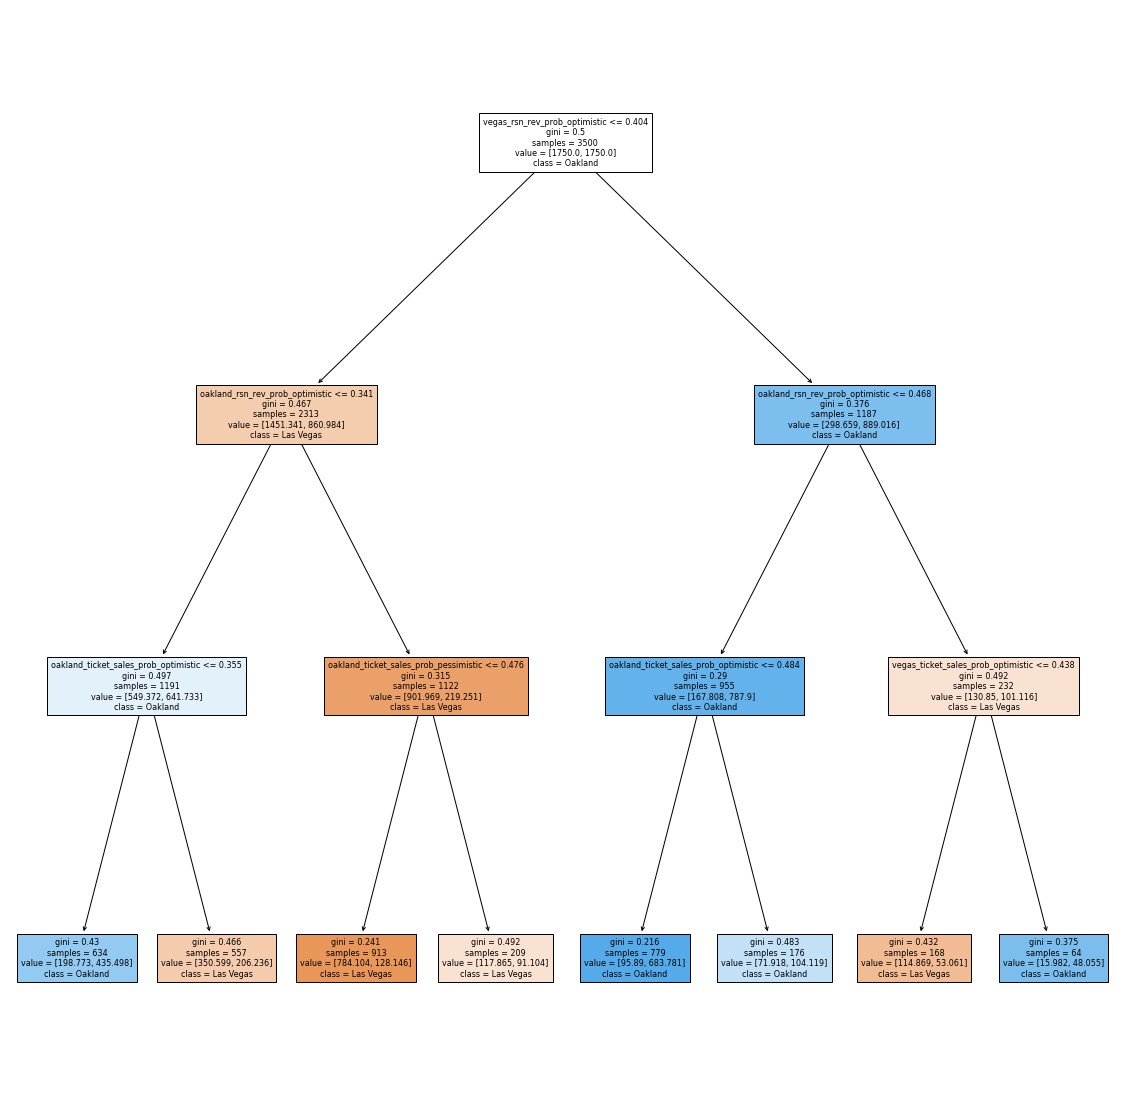

In [46]:
# Plot decision tree results to see how decisions were made
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20))
tree.plot_tree(dec_tree_model, filled = True, feature_names = X.columns, fontsize = 8, class_names = ['Las Vegas', 'Oakland'])
plt.show()

In [47]:
# 10-fold cross-validation scores
cross_val_score(dec_tree_model, X, y, cv=10)

array([0.724, 0.722, 0.718, 0.72 , 0.722, 0.708, 0.732, 0.726, 0.76 ,
       0.702])

In [38]:
X.columns[11]

'vegas_stad_mon_prob_pessimistic'